# 🧪 Pre‑Parcial – Métodos Predictivos
**Supervisado vs. No Supervisado**

> Completa las celdas con `TODO` y ejecuta *Runtime → Run all* antes de entregar.


### Contenido
1. [Parte A – Teoría](#parte-a)
2. [Parte B – Práctica](#parte-b)


## <a id='parte-a'></a>📝 Parte A — Cuestionario Teórico (40 pts)
Responde **brevemente** en las celdas Markdown que siguen a cada pregunta.


#### 1️⃣ **Variable objetivo (y)** – Defínela y da un ejemplo en este dataset.

*Respuesta:* La variable objetivo (y) es la que queremos predecir en un modelo supervisado. Por ejemplo, si el dataset trata sobre predicción de precios de casas, la variable objetivo podría ser precio.


#### 2️⃣ Ordena las fases del *pipeline* de ML: `Modelado`, `Pre‑procesamiento`, `EDA`, `Evaluación`, `Insight de negocio`.

*Respuesta:*
1. Insight de negocio
2. EDA (Análisis exploratorio de datos)
3. Preprocesamiento
4. Modelado
5. Evaluación


#### 3️⃣ Para un problema de **clases desbalanceadas**, ¿qué métrica priorizarías y por qué?

*Respuesta:* En problemas con clases desbalanceadas priorizaria la métrica "F1-score" ya que equilibra la precisión y el recall, lo que es fundamental cuando las clases están desbalanceadas. Esta métrica penaliza tanto los falsos positivos como los falsos negativos, y da una visión más realista del desempeño del modelo en la clase minoritaria.

#### 4️⃣ Describe **overfitting** y cómo lo detectarías en la práctica.

*Respuesta:* El overfitting ocurre cuando un modelo aprende demasiado bien los datos de entrenamiento, incluyendo el ruido, y no generaliza bien a datos nuevos. En la práctica, se detecta comparando el desempeño en los datos de entrenamiento y validación. Si el modelo tiene una precisión muy alta en entrenamiento pero baja en validación, es una señal clara de overfitting.

#### 5️⃣ Completa: *K‑means es un algoritmo de _________ porque ________.*

*Respuesta:* K-means es un algoritmo de **aprendizaje no supervisado** porque **agrupa datos sin usar etiquetas, buscando patrones o similitudes entre ellos para formar clústeres.**



#### 7️⃣ En **regresión**, ¿cómo es la variable objetivo? (cualitativa, cuantitativa, binaria…).

*Respuesta:* En regresión, la variable objetivo es cuantitativa, ya que toma valores numéricos continuos, como precios, temperaturas o tiempos.


#### 8️⃣ Menciona 2 técnicas comunes de **pre‑procesamiento de texto**.

*Respuesta:*
1. Tokenización: dividir el texto en palabras o frases individuales (tokens).
2. Lematización o stemming: reducir las palabras a su forma base o raíz (por ejemplo, “corriendo” → “correr”).


#### 9️⃣ ¿Qué representa el parámetro *k* en K‑means y qué ocurre si es muy grande?

*Respuesta:* El parámetro k en K-means representa el número de clústeres que se desea formar. Si k es muy grande, el modelo puede sobredividir los datos, creando grupos poco significativos o incluso vacíos, y puede llevar a overfitting, perdiendo la capacidad de generalizar.

#### 🔟 Define brevemente un **embedding** en NLP y su utilidad.

*Respuesta:* Un embedding en Procesamiento del Lenguaje Natural (NLP) es una representación numérica densa (vector) de palabras, frases o textos, diseñada para capturar su significado y relaciones semánticas en un espacio continuo de baja dimensión.


## <a id='parte-b'></a>💻 Parte B — Práctica (60 pts)
Trabajarás con la tabla de reseñas de Amazon que contiene, entre otras, las columnas `reviewerID`, `asin`, `helpful`, `reviewText`, `overall`, `summary`, `unixReviewTime`, `day_diff`.

> **Objetivos**
> 1. Clasificar reseñas positivas (rating ≥ 4) vs negativas.
> 2. Agrupar reseñas con K‑means y perfilar clusters.


Columnas de la tabla
📄 Reviewer ID: Unique identifier for the reviewer.

📦 ASIN: Amazon Standard Identification Number for the product.

👤 Reviewer Name: Name of the reviewer.

👍 Helpful: Number of helpful votes the review received.

📝 Review Text: The content of the review written by the customer.

⭐ Overall Rating: The overall rating given to the product (ranging from 1 to 5 stars).

📰 Summary: A brief summary of the review.

🕰️ Unix Review Time: The time the review was posted in Unix timestamp format.

📅 Review Time: The time the review was posted in a readable date format.

📆 Day Difference: The number of days between the review date and the current date.

✔️ Helpful Yes: Number of positive helpful votes.

🔢 Total Votes: Total number of votes the review received.

### 1. Setup

In [1]:
# Instala paquetes extra si los necesitas
# !pip install shap

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings, random, os
warnings.filterwarnings('ignore')
random.seed(42)
np.random.seed(42)

### 2. Carga del dataset

In [2]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/amazon_review.csv.zip

--2025-06-04 18:27:07--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/amazon_review.csv.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/amazon_review.csv.zip [following]
--2025-06-04 18:27:07--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/amazon_review.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 721801 (705K) [application/zip]
Saving to: ‘amazon_review.csv.zip’

amazon_review.csv.z 100%[===================>] 704.8

In [3]:
!unzip amazon_review.csv.zip

Archive:  amazon_review.csv.zip
  inflating: amazon_review.csv       


In [4]:
import pandas as pd
df = pd.read_csv('amazon_review.csv')
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0


### 3. Exploratory Data Analysis (EDA)

In [5]:
df.shape

(4915, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      4915 non-null   object 
 1   asin            4915 non-null   object 
 2   reviewerName    4914 non-null   object 
 3   helpful         4915 non-null   object 
 4   reviewText      4914 non-null   object 
 5   overall         4915 non-null   float64
 6   summary         4915 non-null   object 
 7   unixReviewTime  4915 non-null   int64  
 8   reviewTime      4915 non-null   object 
 9   day_diff        4915 non-null   int64  
 10  helpful_yes     4915 non-null   int64  
 11  total_vote      4915 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 460.9+ KB


In [7]:
df.describe()

,overall,unixReviewTime,day_diff,helpful_yes,total_vote
count,4915.000000,4.915000e+03,4915.000000,4915.000000,4915.000000
mean,4.587589,1.379465e+09,437.367040,1.311089,1.521465
std,0.996845,1.581857e+07,209.439871,41.619161,44.123095
min,1.000000,1.339200e+09,1.000000,0.000000,0.000000
25%,5.000000,1.365898e+09,281.000000,0.000000,0.000000
50%,5.000000,1.381277e+09,431.000000,0.000000,0.000000
75%,5.000000,1.392163e+09,601.000000,0.000000,0.000000
max,5.000000,1.406074e+09,1064.000000,1952.000000,2020.000000


In [8]:
df.isna().sum()

,0
reviewerID,0
asin,0
reviewerName,1
helpful,0
reviewText,1
overall,0
summary,0
unixReviewTime,0
reviewTime,0
day_diff,0



Distribución de la columna 'overall' (rating):
overall
5.0    3922
4.0     527
1.0     244
3.0     142
2.0      80
Name: count, dtype: int64
overall
5.0    0.797965
4.0    0.107223
1.0    0.049644
3.0    0.028891
2.0    0.016277
Name: proportion, dtype: float64


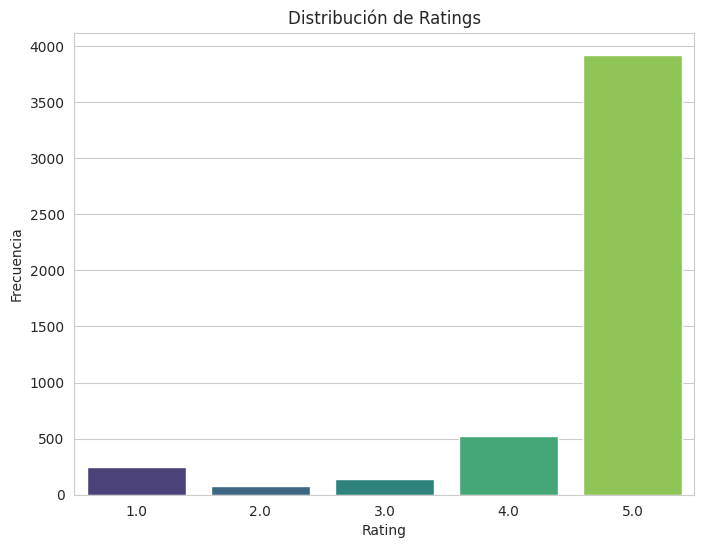

In [9]:
print("\nDistribución de la columna 'overall' (rating):")
print(df['overall'].value_counts())
print(df['overall'].value_counts(normalize=True))
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='overall', data=df, palette='viridis')
plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()


Distribución de la variable objetivo 'sentimiento':
sentimiento
positivo    4449
negativo     466
Name: count, dtype: int64
sentimiento
positivo    0.905188
negativo    0.094812
Name: proportion, dtype: float64


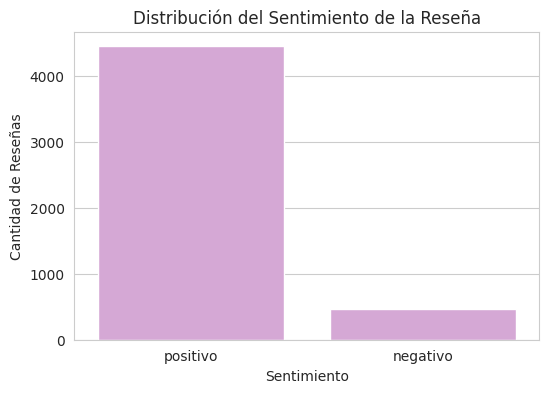

In [10]:
df['sentimiento'] = df['overall'].apply(lambda x: 'positivo' if x >= 4 else 'negativo')
print("\nDistribución de la variable objetivo 'sentimiento':")
print(df['sentimiento'].value_counts())
print(df['sentimiento'].value_counts(normalize=True))
plt.figure(figsize=(6, 4))
sns.countplot(x='sentimiento', data=df, color="plum")
plt.title('Distribución del Sentimiento de la Reseña')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Reseñas')
plt.show()

### 4. Limpieza & Feature Engineering

### 4.1 Cree un revie_datetime usando unixReviewTime y la funcion pd.to_datetime

In [11]:
df['review_datetime'] = pd.to_datetime(df['unixReviewTime'], unit='s')
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,sentimiento,review_datetime
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0,positivo,2014-07-23
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,positivo,2013-10-25
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0,positivo,2012-12-23
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,positivo,2013-11-21
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0,positivo,2013-07-13


### 4.2 Cree una columna positive que sea igual a 1 cuando overall sea mayor o igual  a 4.

In [12]:
df['positive'] = np.where(df['overall'] >= 4, 1, 0)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,sentimiento,review_datetime,positive
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0,positivo,2014-07-23,1
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,positivo,2013-10-25,1
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0,positivo,2012-12-23,1
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,positivo,2013-11-21,1
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0,positivo,2013-07-13,1


### 4.3 Cree una columna text que sea la union de summary y review text: text_cols['summary'] + '. ' + text_cols['reviewText']).str.strip()

In [13]:
text_cols = df[['summary', 'reviewText']].fillna('')
df['text'] = (text_cols['summary'] + '. ' + text_cols['reviewText']).str.strip()
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,sentimiento,review_datetime,positive,text
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0,positivo,2014-07-23,1,Four Stars. No issues.
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,positivo,2013-10-25,1,"MOAR SPACE!!!. Purchased this for my device, i..."
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0,positivo,2012-12-23,1,nothing to really say..... it works as expecte...
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,positivo,2013-11-21,1,Great buy at this price!!! *** UPDATE. This t...
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0,positivo,2013-07-13,1,best deal around. Bought it with Retail Packag...


### 4.4 Elimine las columnas que no puede usar en el modleo de clasificacion

In [14]:
columns_to_drop = ['reviewerID', 'asin', 'reviewerName', 'helpful', 'overall', 'summary', 'unixReviewTime', 'day_diff', 'reviewTime', 'sentimiento', 'review_datetime']
df_cleaned = df.drop(columns=columns_to_drop)
print("DataFrame after dropping irrelevant columns:")
print(df_cleaned.head())
print("\nInformation about the cleaned DataFrame:")
df_cleaned.info()

DataFrame after dropping irrelevant columns:
                                          reviewText  helpful_yes  total_vote  \
0                                         No issues.            0           0   
1  Purchased this for my device, it worked as adv...            0           0   
2  it works as expected. I should have sprung for...            0           0   
3  This think has worked out great.Had a diff. br...            0           0   
4  Bought it with Retail Packaging, arrived legit...            0           0   

   positive                                               text  
0         1                             Four Stars. No issues.  
1         1  MOAR SPACE!!!. Purchased this for my device, i...  
2         1  nothing to really say..... it works as expecte...  
3         1  Great buy at this price!!!  *** UPDATE. This t...  
4         1  best deal around. Bought it with Retail Packag...  

Information about the cleaned DataFrame:
<class 'pandas.core.frame.DataFrame'

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
        df['text'], df['positive'], test_size=0.3, stratify=df['positive'], random_state=42)

pipe = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000)),
    ('clf',  LogisticRegression(max_iter=1000, class_weight='balanced', n_jobs=-1, random_state=42))
])

# pipe.fit(X_train, y_train)

### 5. Modelo de Clasificación – Supervisado (25 pts)
  * Ralice una regreison logistica y use la columa positive que creoo como target, entregue una matriz de confusion

In [16]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [17]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.78      0.64       140
           1       0.98      0.93      0.95      1335

    accuracy                           0.92      1475
   macro avg       0.76      0.86      0.80      1475
weighted avg       0.94      0.92      0.92      1475




Confusion Matrix:


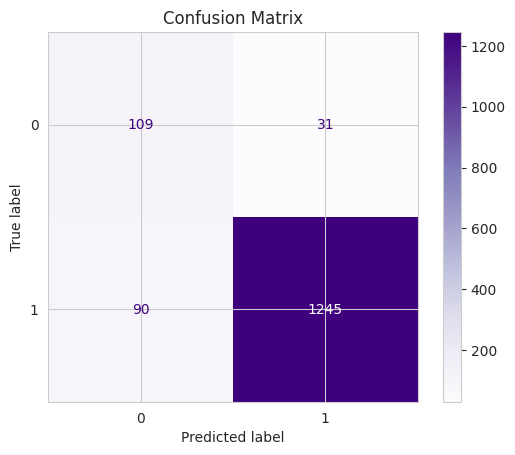

In [18]:
print("\nConfusion Matrix:")
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test, cmap=plt.cm.Purples)
plt.title("Confusion Matrix")
plt.show()

### 6. Clustering K‑means – No Supervisado (20 pts)
Haga un modelo para agrupasr los comentarios: vectorizer = TfidfVectorizer(max_features=10000)
X_vec = vectorizer.fit_transform(df['text'])

y cre una variable que se llame clsuter

In [19]:
vectorizer = TfidfVectorizer(max_features=10000)
X_vec = vectorizer.fit_transform(df['text'])

In [20]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Añadimos n_init para evitar warning
cluster_labels = kmeans.fit_predict(X_vec)

In [21]:
df['cluster'] = cluster_labels
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,sentimiento,review_datetime,positive,text,cluster
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0,positivo,2014-07-23,1,Four Stars. No issues.,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,positivo,2013-10-25,1,"MOAR SPACE!!!. Purchased this for my device, i...",3
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0,positivo,2012-12-23,1,nothing to really say..... it works as expecte...,3
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,positivo,2013-11-21,1,Great buy at this price!!! *** UPDATE. This t...,2
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0,positivo,2013-07-13,1,best deal around. Bought it with Retail Packag...,3


In [22]:
print("Distribución de los clusters:")
print(df['cluster'].value_counts())

Distribución de los clusters:
cluster
3    1730
2    1222
1    1123
4     790
0      50
Name: count, dtype: int64


#### Perfil de clusters: Entregue una descriptiva de que contenia cada clster en termino de las otras variables

In [23]:
# Suponiendo que df ya está cargado y pre-procesado con las columnas 'text', 'cluster', 'overall', 'helpful', 'day_diff', 'sentimiento', 'positive'

# --- Perfil de Clusters ---

print("--- Perfil de Clusters ---")

# 1. Análisis de Variables Numéricas por Cluster
print("\n1. Perfil por Variables Numéricas (overall, helpful, day_diff):")

# Ensure numeric columns are of the correct type before aggregation
# Using errors='coerce' will turn any values that cannot be converted into NaN
for col in ['overall', 'helpful', 'day_diff']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

cluster_numeric_summary = df.groupby('cluster')[['overall', 'helpful', 'day_diff']].agg(['mean', 'median', 'std', 'count'])
print(cluster_numeric_summary)
print("-" * 50)

# 2. Análisis de Sentimiento (positive/negative) por Cluster
print("\n2. Perfil por Sentimiento (positivo/negativo):")
cluster_sentiment_dist = df.groupby('cluster')['sentimiento'].value_counts(normalize=True).unstack().fillna(0)
print(cluster_sentiment_dist)

# 3. Análisis de la variable binaria 'positive' por Cluster
print("\n3. Perfil por Variable 'positive' (0/1):")
cluster_positive_dist = df.groupby('cluster')['positive'].value_counts(normalize=True).unstack().fillna(0)
print(cluster_positive_dist)
print("-" * 50)

# 4. Análisis del Contenido de Texto (Ejemplos)
print("\n4. Ejemplos Representativos de Comentarios por Cluster:")
for i in sorted(df['cluster'].unique()):
    print(f"\n--- Cluster {i} ---")
    # Seleccionar aleatoriamente algunas reseñas para mostrar
    cluster_reviews = df[df['cluster'] == i]['text'].sample(min(5, len(df[df['cluster'] == i])), random_state=42) # Muestra un máximo de 5
    if not cluster_reviews.empty:
        for j, review in enumerate(cluster_reviews):
            print(f"  Ejemplo {j+1}: {review[:300]}...") # Mostrar los primeros 300 caracteres
    else:
        print("  No hay reseñas en este cluster.")
print("-" * 50)

# 5. (Opcional) Análisis de Palabras Clave por Cluster (usando el vectorizador TF-IDF)
# Esto requiere acceder a las características del vectorizador y las centroides del K-means
print("\n5. Palabras Clave Sugeridas por Cluster (basado en TF-IDF y centroides):")
if 'vectorizer' in locals() and 'kmeans' in locals():
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out() # Usar get_feature_names_out() en versiones recientes de scikit-learn

    for i in range(kmeans.n_clusters):
        print(f"Cluster {i}:", end='')
        for ind in order_centroids[i, :10]: # Mostrar las 10 palabras más importantes
            print(f' {terms[ind]}', end='')
        print()
else:
    print("El vectorizador TF-IDF o el modelo K-means no están disponibles.")
print("-" * 50)

--- Perfil de Clusters ---

1. Perfil por Variables Numéricas (overall, helpful, day_diff):
          overall                        helpful                     day_diff  \
             mean median       std count    mean median std count        mean   
cluster                                                                         
0        4.940000    5.0  0.239898    50     NaN    NaN NaN     0  155.760000   
1        4.095280    5.0  1.423887  1123     NaN    NaN NaN     0  492.729297   
2        4.924714    5.0  0.322604  1222     NaN    NaN NaN     0  428.057283   
3        4.599422    5.0  0.974338  1730     NaN    NaN NaN     0  422.907514   
4        4.717722    5.0  0.717385   790     NaN    NaN NaN     0  422.556962   

                                  
        median         std count  
cluster                           
0        154.0  109.559705    50  
1        496.0  217.110685  1123  
2        422.0  203.281519  1222  
3        402.5  202.661994  1730  
4        417.5

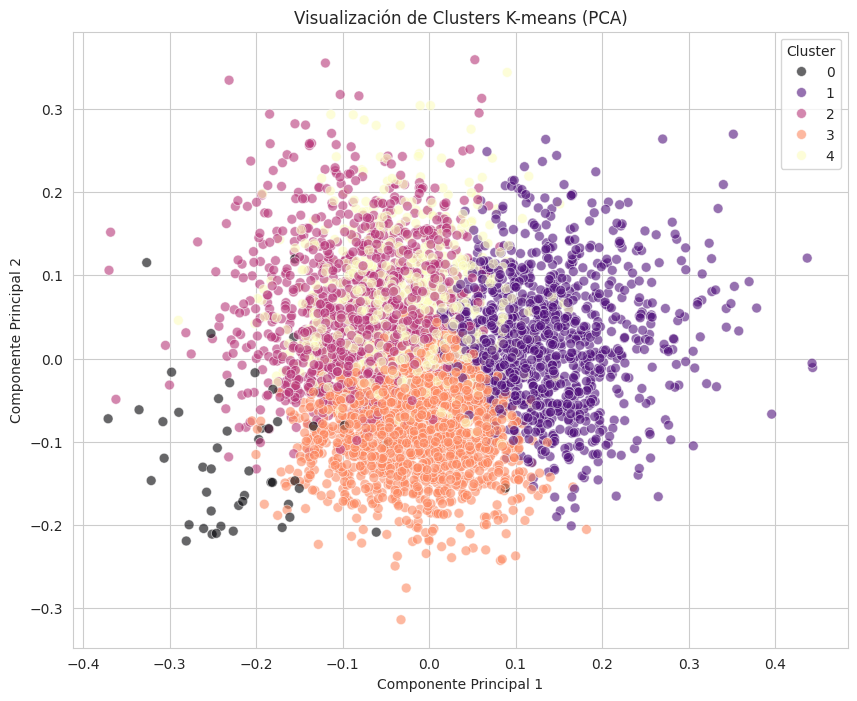

In [24]:
from sklearn.decomposition import PCA

# Reducir la dimensionalidad a 2 componentes para visualización
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_vec.toarray()) # Convertir la matriz dispersa a densa para PCA

# Crear un DataFrame para la visualización
pca_df = pd.DataFrame(data=X_pca, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['Cluster'] = cluster_labels # Añadir las etiquetas de cluster al DataFrame

# Visualizar los clusters en un scatterplot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA Component 1', y='PCA Component 2', hue='Cluster', data=pca_df, palette='magma', s=50, alpha=0.6)
plt.title('Visualización de Clusters K-means (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


### 7. Insight & Recomendaciones (15 pts)

*Escribe aquí tu análisis de cómo se relacionan los errores del modelo con los clusters y propone 1‑2 acciones de negocio basadas en tus hallazgos.*

<!-- TODO -->

En el taller se trabajó con un conjunto de reseñas de Amazon, aplicando modelos de aprendizaje automático para clasificar reseñas positivas y negativas, y técnicas de clustering para agrupar comentarios similares. El modelo de regresión logística presentó errores de clasificación, como falsos positivos (reseñas negativas clasificadas como positivas) y falsos negativos (positivas clasificadas como negativas).

Al relacionar estos errores con los clusters generados por el modelo K-means, se observó que los fallos del modelo no eran aleatorios, sino que se concentraban en ciertos grupos. Por ejemplo, en clusters con reseñas ambiguas, irónicas o con críticas sutiles, el modelo tendía a equivocarse más, lo que sugiere que no logra interpretar adecuadamente el tono o el contexto. Desde una perspectiva de marketing, estos hallazgos permiten identificar segmentos de consumidores con formas de comunicación distintas, lo cual es clave para ofrecer una mejor experiencia.

Como acción estratégica, se recomienda adaptar la atención al cliente según el perfil de cada cluster, priorizando aquellos donde hay más insatisfacción no detectada por el modelo. Además, se sugiere entrenar modelos específicos por tipo de cluster para mejorar la precisión del análisis de sentimiento. En conjunto, este enfoque permite comprender mejor al consumidor, refinar la comunicación y tomar decisiones más alineadas con sus percepciones reales.

## ✅ 8. Checklist final
- [ ] Notebook corre sin errores
- [ ] Respuestas teóricas completadas
- [ ] Comentarios claros y semillas fijas
- [ ] 5 slides creadas y exportadas a PDF
